In [3]:
import numpy as np # lineer cebir kütüphanesi
import pandas as pd # veri işleme kütüphanesi, CSV dosyası için
import matplotlib.pyplot as plt #  Grafikler ve görselleştirme için kullanılacak kütüphane
import seaborn as sns

import os
print(os.listdir("../input"))

['Mall_Customers.csv']


In [79]:
dataset = pd.read_csv('../input/Mall_Customers.csv')
dataset.rename(columns={
                        "CustomerID": "Müşteri Numarası", 
                        "Gender": "Cinsiyeti","Age":"Yaş",
                        "Annual Income (k$)":"Yıllık Gelir($)",
                       "Spending Score (1-100)":"Harcama Skoru (1-100)"
                       })

,Müşteri Numarası,Cinsiyeti,Yaş,Yıllık Gelir($),Harcama Skoru (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [73]:
#Verilerimizi Kontrol Ediyoruz.
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
#Verilerin şeklini kontrol ediyoruz.
dataset.shape
#200 Satırdan ve 5 Stundan oluştuğunu görüyoruz

(200, 5)

In [75]:
#Veri tiplerini kontrol ediyoruz
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [80]:
#Şimdi veri kümesindeki NULL değerleri kontrol ediyoruz
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

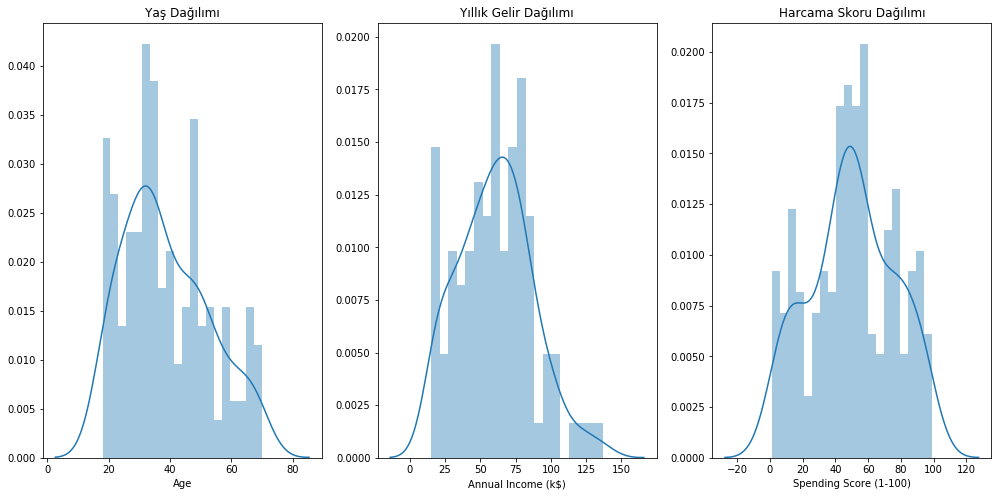

In [81]:
plt.figure(1 , figsize = (17 , 8))
n = 0
grafikBasliklari=['Yaş','Yıllık Gelir','Harcama Skoru']
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(dataset[x] , bins = 20)
    plt.title('{} Dağılımı'.format(grafikBasliklari[n-1]))
plt.show()

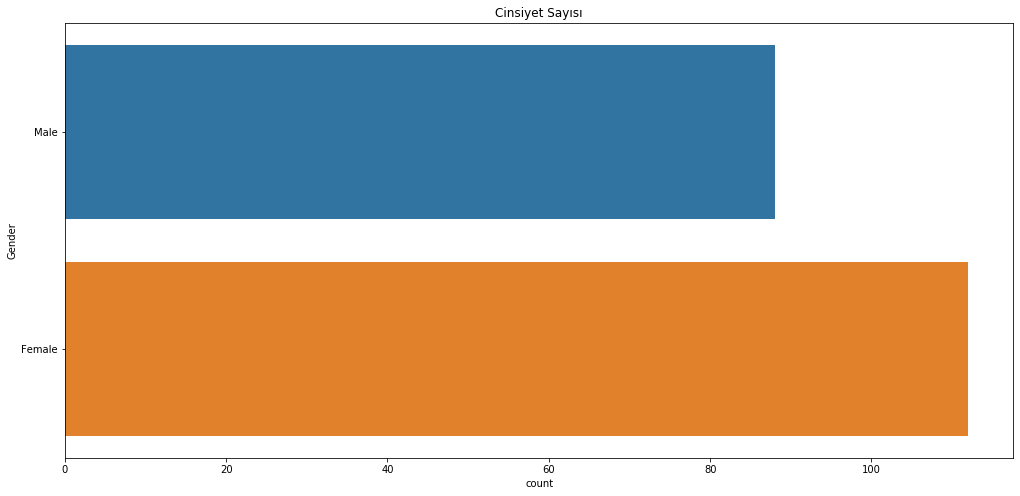

In [56]:
plt.figure(1 , figsize = (17 , 8))
ax = sns.countplot(y = 'Gender' , data = dataset).set_title('Cinsiyet Sayısı')
plt.show()

In [82]:
### Modeller için özellik seçeceğiz
#Sadece 2 özellik göz önüne alınacak yıllık gelir(Annual income) ve Harcama skoru(Spending Score).
x = dataset.iloc[:, [3,4]].values
# Oluşturduğumuz modeli yazdıralım
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

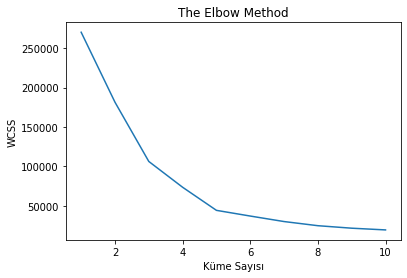

In [63]:
# Elbow Method, bir veri kümesinde uygun sayıda kümenin bulunmasına yardımcı olmak için
# tasarlanmış küme analizindeki tutarlılığın yorumlanması ve doğrulanması için sezgisel bir yöntemdir
# WCSS (Within Cluster Sum of Square) her bir noktanın küme merkezine olan uzaklığının karesinin toplamını alınarak hesaplanır.
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()
# ELBOW'un k = 5 olduğunu açıkça görebiliyoruz, bu yüzden k = 5 seçeceğiz, böylece Kümeleri oluşturacağız.

In [64]:
#n_clusters, tanımlayacağımız kümelerin bir sayısıdır.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#X'i tahmin edelim
y_kmeans = kmeans.fit_predict(x)

In [34]:
print(y_kmeans)
#Tahminimizi veri çerçevesine dönüştürüyoruz, böylece bu tahmini tablo biçiminde kolayca görebiliyoruz.
df_pred = pd.DataFrame(y_kmeans)
df_pred.head()

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


,0
0,2
1,3
2,2
3,3
4,2


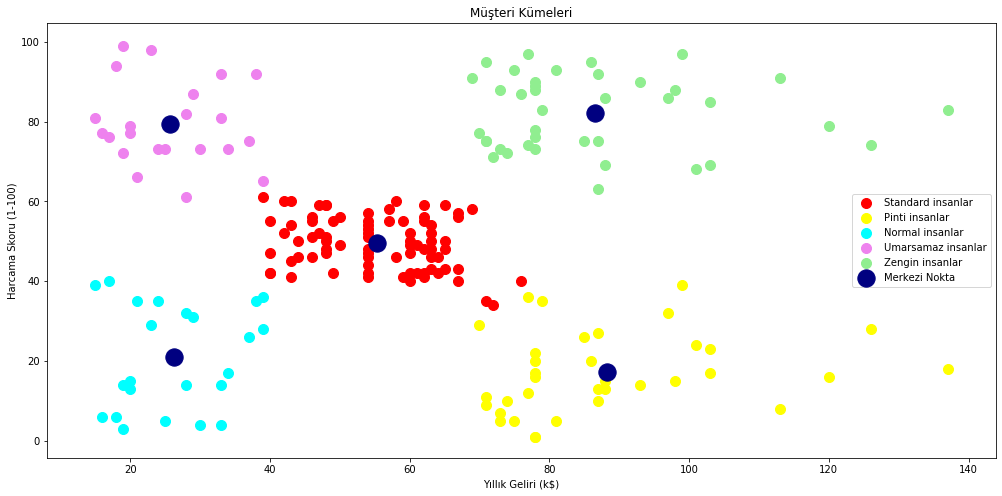

In [83]:
plt.figure(1 , figsize = (17 , 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard insanlar')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Pinti insanlar')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'aqua', label = 'Normal insanlar')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'violet', label = 'Umarsamaz insanlar')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'lightgreen', label = 'Zengin insanlar')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'navy', label = 'Merkezi Nokta')
plt.title('Müşteri Kümeleri')
plt.xlabel('Yıllık Geliri (k$)')
plt.ylabel('Harcama Skoru (1-100)')
plt.legend()
plt.show()
#Cluster 1 (Kırmızı) -> Orta seviyede kazanıyor ve harcıyor
#cluster 2 (Sarı) -> Çok kazanıyor ama az harcıyor 
#cluster 3 (Aqua) -> Az kazanıyorlar ve az harcıyorlar
#cluster 4 (Violet) -> Az kazanıyorlar ama çok harcıyorlar -> Alışveriş merkezi bu tür kişileri hedeflemelidir.
#Cluster 5 (Açık yeşil) -> Çok kazanıyorlar ve Çok harcıyorlar -> Alışveriş merkezi bu tür kişileri hedeflemelidir.

In [65]:
#Sonunda Mall veri setinin müşteri segmantasyonunu tamamlıyoruz